# Employee Reviews Analysis 
### By: Lauren Mengert

# Hypothesis: Current employees rate their company higher than former employees


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Extract Source Data

This CSV contains both current and fomer employee reviews of Google, Amazon, Facebook, Netflix, Apple and Micrsoft.

In [64]:
reviews = pd.read_csv('/Users/laurenmengert/Downloads/employee_reviews.csv')

reviews.head(20)


,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
1,2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...
2,3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...
3,4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5.0,2.0,5.0,5.0,4.0,5.0,498,https://www.glassdoor.com/Reviews/Google-Revie...
4,5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5.0,5.0,5.0,5.0,5.0,5.0,49,https://www.glassdoor.com/Reviews/Google-Revie...
5,6,google,"Mountain View, CA","Dec 9, 2018",Former Employee - SDE2,NICE working in GOOGLE as an INTERN,"People are not that busy, so they are nice to ...",Food is not good as I expected. People said it...,none,5.0,4.0,4.0,4.0,5.0,4.0,1,https://www.glassdoor.com/Reviews/Google-Revie...
6,7,google,"New York, NY","Dec 11, 2018",Current Employee - Software Engineer,Software engineer,Great working environment. Good work life balance,Usual big company problems. Hierarchy.,none,5.0,5.0,4.0,4.0,5.0,4.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
7,8,google,none,"Dec 11, 2018",Former Employee - Anonymous Employee,great place to work and progress,"work culture, benefits, growth, people,",No cons that i can think of,none,5.0,5.0,5.0,5.0,5.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
8,9,google,"New York, NY","Dec 10, 2018",Current Employee - Anonymous Employee,Google Surpasses Realistic Expectations,Great products. Vision you can feel good about...,Younger employees complaining about the compan...,none,5.0,5.0,5.0,5.0,5.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
9,10,google,none,"Dec 9, 2018",Current Employee - Anonymous Employee,Execellent for engineers,Impact driven. Best tech in the world.,Size matters. Engineers are a bit disconnected...,none,5.0,5.0,5.0,5.0,5.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...


## Cleaning the Data

There were many columns that were not needed for my analysis. The graphs that I wanted to create required floats and integers, not strings.

In [3]:
reviews2 = reviews.drop(['Unnamed: 0','summary', 'pros', 'cons', 'advice-to-mgmt', 'link'], axis = 1)
reviews2.iloc[15:20]

,company,location,dates,job-title,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count
15,google,none,"Dec 6, 2018",Current Employee - Anonymous Employee,5.0,none,none,none,none,none,0
16,google,none,"Nov 29, 2018",Current Employee - Anonymous Employee,5.0,4.0,5.0,5.0,5.0,4.0,2
17,google,none,"Dec 2, 2018",Former Employee - Anonymous Employee,5.0,none,none,2.0,none,none,1
18,google,none,"Dec 1, 2018",Former Employee - Anonymous Employee,5.0,5.0,5.0,5.0,5.0,5.0,1
19,google,none,"Dec 3, 2018",Current Employee - Anonymous Employee,5.0,5.0,5.0,5.0,5.0,5.0,0


### Problem 1 : You cannot plot objects

In [4]:
reviews2.dtypes

company                        object
location                       object
dates                          object
job-title                      object
overall-ratings               float64
work-balance-stars             object
culture-values-stars           object
carrer-opportunities-stars     object
comp-benefit-stars             object
senior-mangemnet-stars         object
helpful-count                   int64
dtype: object

### Problem 2: 'None' values
I changed 'None' to 'NaN' and returned the other values as floats.

In [5]:
def replace_none(value):
    if value == 'none':
        return np.nan
    return float(value)

reviews2['work-balance-stars'] = reviews2['work-balance-stars'].apply(replace_none)
reviews2['culture-values-stars'] = reviews2['culture-values-stars'].apply(replace_none)
reviews2['carrer-opportunities-stars'] = reviews2['carrer-opportunities-stars'].apply(replace_none)
reviews2['comp-benefit-stars'] = reviews2['comp-benefit-stars'].apply(replace_none)
reviews2['senior-mangemnet-stars'] = reviews2['senior-mangemnet-stars'].apply(replace_none)

reviews2.iloc[15:20]

,company,location,dates,job-title,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count
15,google,none,"Dec 6, 2018",Current Employee - Anonymous Employee,5.0,NaN,NaN,NaN,NaN,NaN,0
16,google,none,"Nov 29, 2018",Current Employee - Anonymous Employee,5.0,4.0,5.0,5.0,5.0,4.0,2
17,google,none,"Dec 2, 2018",Former Employee - Anonymous Employee,5.0,NaN,NaN,2.0,NaN,NaN,1
18,google,none,"Dec 1, 2018",Former Employee - Anonymous Employee,5.0,5.0,5.0,5.0,5.0,5.0,1
19,google,none,"Dec 3, 2018",Current Employee - Anonymous Employee,5.0,5.0,5.0,5.0,5.0,5.0,0


### As you can see, the values have been changed to floats and can therefore be plotted

In [6]:
reviews2.dtypes

company                        object
location                       object
dates                          object
job-title                      object
overall-ratings               float64
work-balance-stars            float64
culture-values-stars          float64
carrer-opportunities-stars    float64
comp-benefit-stars            float64
senior-mangemnet-stars        float64
helpful-count                   int64
dtype: object

### 'NaN' values were dropped so the rest of the data would be easier to plot

In [7]:
reviews2.dropna().head()

,company,location,dates,job-title,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count
0,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,5.0,4.0,5.0,5.0,4.0,5.0,0
1,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,4.0,2.0,3.0,3.0,5.0,3.0,2094
2,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,5.0,5.0,4.0,5.0,5.0,4.0,949
3,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,5.0,2.0,5.0,5.0,4.0,5.0,498
4,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,5.0,5.0,5.0,5.0,5.0,5.0,49


### I needed to drop the extra title's under the 'Job Title' column as well. The titles 'Current Employee' and 'Former Employee' were all I needed.

In [8]:
def job_title_change(title):
    if title[:4] == 'Curr':
        return 'Current Employee'
    elif title[:4] == 'Form':
        return 'Former Employee'
    return title
    
    
reviews2['job-title'] = reviews2['job-title'].apply(job_title_change)
reviews2.head()

,company,location,dates,job-title,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count
0,google,none,"Dec 11, 2018",Current Employee,5.0,4.0,5.0,5.0,4.0,5.0,0
1,google,"Mountain View, CA","Jun 21, 2013",Former Employee,4.0,2.0,3.0,3.0,5.0,3.0,2094
2,google,"New York, NY","May 10, 2014",Current Employee,5.0,5.0,4.0,5.0,5.0,4.0,949
3,google,"Mountain View, CA","Feb 8, 2015",Current Employee,5.0,2.0,5.0,5.0,4.0,5.0,498
4,google,"Los Angeles, CA","Jul 19, 2018",Former Employee,5.0,5.0,5.0,5.0,5.0,5.0,49


### Double checking that we only have 'Current Employee' and 'Former Employee'

In [9]:
reviews2['job-title'].unique()

array(['Current Employee', 'Former Employee'], dtype=object)

### Time to plot 'Current Employee' ratings vs. 'Former Employee' ratings.

Text(0.5, 0, 'Rating')

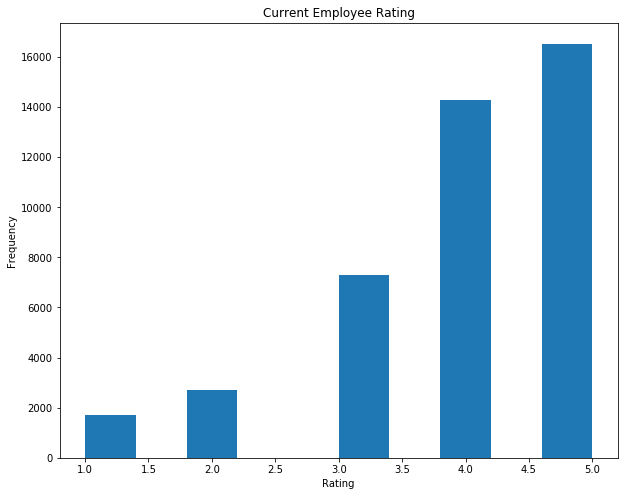

In [10]:
current_employee = reviews2[reviews2['job-title'] == 'Current Employee']
current_employee['overall-ratings'].plot(kind = 'hist', figsize = (10,8))
plt.title('Current Employee Rating')
plt.xlabel('Rating')

Text(0.5, 0, 'Rating')

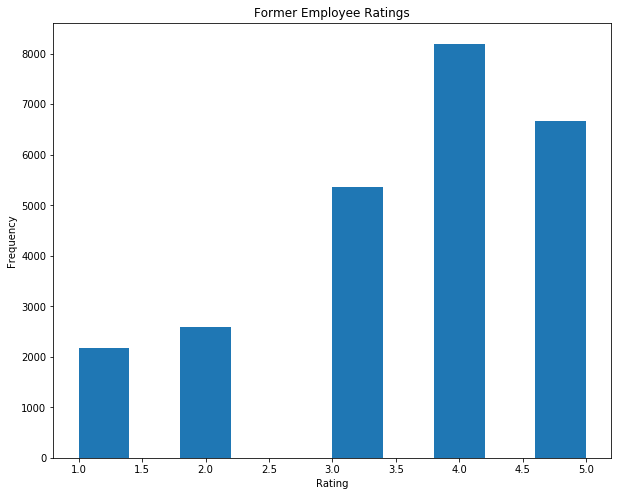

In [11]:

former_employee = reviews2[reviews2['job-title'] == 'Former Employee']
former_employee['overall-ratings'].plot(kind = 'hist', figsize = (10,8))
plt.title('Former Employee Ratings')
plt.xlabel('Rating')

### I then realized that there were far more current employees than there were former employees so how could I possibly plot this data fairly?

In [12]:
reviews2['job-title'].value_counts()

Current Employee    42540
Former Employee     24989
Name: job-title, dtype: int64

### By getting the average ratings instead
I created a new dataframe and grouped by the company and job title since those were my main focus. I then grabbed the average rating for each column.

In [13]:
employees = reviews2.groupby(['company', 'job-title']).mean()
employees

overall-ratings  work-balance-stars  \
company   job-title                                               
amazon    Current Employee         3.795673            3.186608   
          Former Employee          3.171523            2.658469   
apple     Current Employee         4.059349            3.462536   
          Former Employee          3.828425            3.243620   
facebook  Current Employee         4.667709            4.058353   
          Former Employee          3.871383            3.385000   
google    Current Employee         4.425732            4.052658   
          Former Employee          4.210828            3.913713   
microsoft Current Employee         3.914430            3.723907   
          Former Employee          3.650203            3.392242   
netflix   Current Employee         3.925926            3.666237   
          Former Employee          2.896296            2.837366   

                            culture-values-stars  carrer-opportunities-stars  \
company   job-title                                                            
amazon    Current Employee              3.746657                    3.800929   
          Former Employee               3.089632                    3.196848   
apple     Current Employee              4.206758                    3.540298   
          Former Employee               3.960746                    3.258722   
facebook  Current Employee              4.667808                    4.489992   
          Former Employee               3.870629                    3.803691   
google    Current Employee              4.423222                    4.032124   
          Former Employee               4.250443                    3.851105   
microsoft Current Employee              3.788607                    3.730622   
          Former Employee               3.442049                    3.539632   
netflix   Current Employee              4.029046                    3.452320   
          Former Employee               3.045802                    2.648501   

                            comp-benefit-stars  senior-mangemnet-stars  \
company   job-title                                                      
amazon    Current Employee            3.788229                3.382486   
          Former Employee             3.501946                2.738866   
apple     Current Employee            4.081513                3.608034   
          Former Employee             3.945219                3.275079   
facebook  Current Employee            4.594649                4.430288   
          Former Employee             4.414716                3.571667   
google    Current Employee            4.396731                3.914706   
          Former Employee             4.348326                3.743009   
microsoft Current Employee            3.994375                3.250738   
          Former Employee             4.017983                2.956068   
netflix   Current Employee            4.327320                3.768135   
          Former Employee             3.916667                2.600271   

                            helpful-count  
company   job-title                        
amazon    Current Employee       1.350957  
          Former Employee        1.426142  
apple     Current Employee       1.227229  
          Former Employee        1.104743  
facebook  Current Employee       2.967944  
          Former Employee        6.463023  
google    Current Employee       1.491558  
          Former Employee        1.942994  
microsoft Current Employee       0.615555  
          Former Employee        0.521307  
netflix   Current Employee       4.790123  
          Former Employee        7.004938

Text(0, 0.5, 'Average Rating')

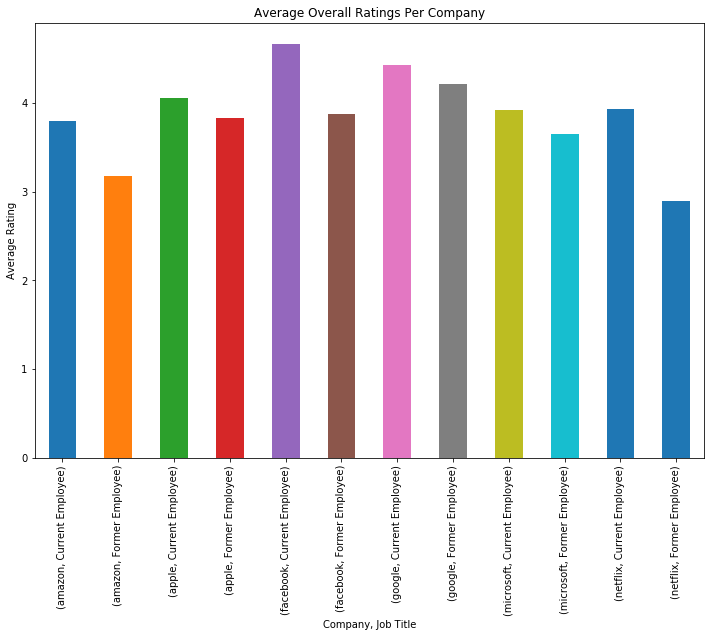

In [14]:
employees['overall-ratings'].plot(kind = 'bar', figsize = (12,8))
plt.title('Average Overall Ratings Per Company')
plt.xlabel('Company, Job Title')
plt.ylabel('Average Rating')

### Does this apply to different regions of the country?
I decided to create charts comparing the east and west coasts of the United States.

In [32]:
reviews2['location'].value_counts()

none                               25085
Redmond, WA                         5613
Seattle, WA                         4963
Hyderabad (India)                   2150
Mountain View, CA                   1706
Bengaluru (India)                   1607
Cupertino, CA                       1291
New York, NY                        1152
London, England (UK)                 930
Menlo Park, CA                       805
Dublin, Co. Dublin (Ireland)         723
Chennai (India)                      678
San Francisco, CA                    618
Austin, TX                           542
Bellevue, WA                         478
Los Angeles, CA                      344
Cork (Ireland)                       295
Phoenix, AZ                          291
Chicago, IL                          290
Dallas, TX                           280
Atlanta, GA                          253
Singapore (Singapore)                253
Los Gatos, CA                        250
Sunnyvale, CA                        240
Toronto, ON (Can

### I first created new dataframes with the information I needed

In [56]:
NY_employee = reviews2[reviews2['location'] == 'New York, NY']
CA_employee = reviews2[reviews2['location'] == 'San Francisco, CA']

In [62]:
NY_employee.head()

,company,location,dates,job-title,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count
2,google,"New York, NY","May 10, 2014",Current Employee,5.0,5.0,4.0,5.0,5.0,4.0,949
6,google,"New York, NY","Dec 11, 2018",Current Employee,5.0,5.0,4.0,4.0,5.0,4.0,0
8,google,"New York, NY","Dec 10, 2018",Current Employee,5.0,5.0,5.0,5.0,5.0,5.0,0
20,google,"New York, NY","Nov 26, 2018",Current Employee,5.0,3.0,4.0,3.0,4.0,5.0,2
37,google,"New York, NY","Dec 6, 2018",Current Employee,4.0,4.0,3.0,3.0,4.0,3.0,0


In [63]:
CA_employee.head()

,company,location,dates,job-title,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count
13,google,"San Francisco, CA","Dec 3, 2018",Current Employee,5.0,5.0,5.0,5.0,4.0,4.0,1
27,google,"San Francisco, CA","Nov 17, 2018",Current Employee,5.0,5.0,5.0,5.0,5.0,5.0,3
68,google,"San Francisco, CA","Nov 4, 2018",Current Employee,5.0,4.0,5.0,5.0,5.0,4.0,0
91,google,"San Francisco, CA","Oct 25, 2018",Current Employee,5.0,4.0,5.0,5.0,5.0,5.0,0
103,google,"San Francisco, CA","Oct 21, 2018",Current Employee,5.0,5.0,4.0,5.0,5.0,4.0,0


### I then got the average ratings for each location

In [57]:
NY = NY_employee.groupby(['company', 'job-title']).mean()
CA = CA_employee.groupby(['company', 'job-title']).mean()

Text(0, 0.5, 'Rating')

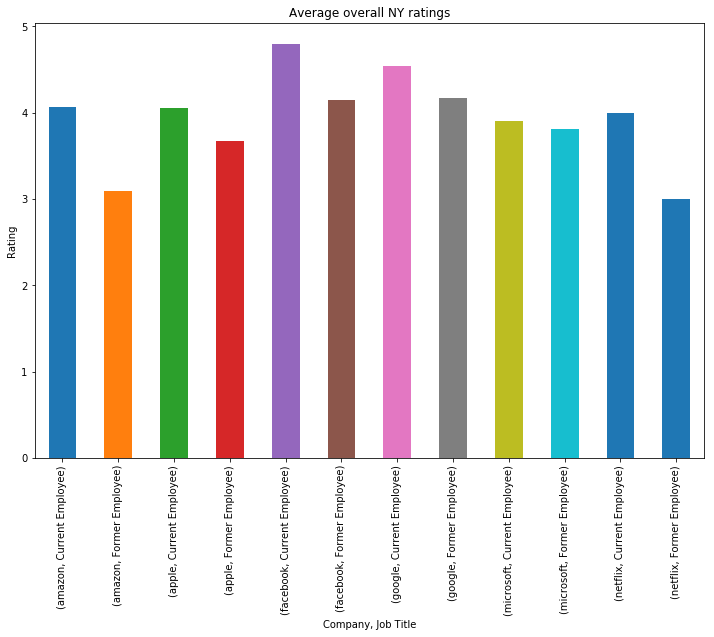

In [58]:
NY['overall-ratings'].plot(kind = 'bar', figsize = (12,8))
plt.title('Average overall NY ratings')
plt.xlabel('Company, Job Title')
plt.ylabel('Rating')

Text(0, 0.5, 'Rating')

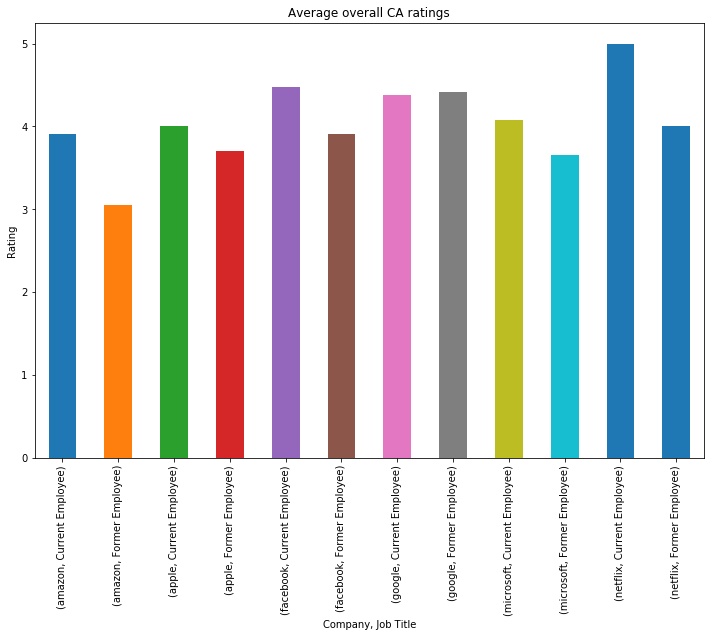

In [59]:
CA['overall-ratings'].plot(kind = 'bar', figsize = (12,8))
plt.title('Average overall CA ratings')
plt.xlabel('Company, Job Title')
plt.ylabel('Rating')

# Conclusion:
While differences in ratings between current and former employees may vary from company to company, current employees are generally rating their company higher than former employees across the board. The only exception I found was Google employees living in San Francisco,CA.

# Further Investigations that may be done:

I think it would be interesting to compare the different types of ratings as well. For example, how did former employees of Google feel about their senior management staff in comparison to current employees?

Also, a comparison of different countries would be very insightful. There is a possibility that employees in Europe may be happier than those in the United States because I know that a lot of countries in Europe take work life balance very seriously.